In [27]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


from bs4 import BeautifulSoup

In [368]:
page = requests.get("https://priceoye.pk/")
page.status_code

200

In [369]:
soup = BeautifulSoup(page.content, 'html.parser')

In [4]:
#Category Navigations:
navigation_div = soup.find_all('div', class_='sb-all-category')[0]
navigation_div
navigation_div.find_all('a')[0]['href']

'https://priceoye.pk/mobiles'

In [6]:
#Page Navigation Links:

navigation_links = navigation_div.find_all('a')
navigation = []
product_boxes = []

for i in navigation_links:
    page_link = i['href']
    sublink_page = requests.get(page_link)
    sublink_soup = BeautifulSoup(sublink_page.content, 'html.parser')
    product_boxes.append(sublink_soup.find_all('div',class_='productBox'))
    navigation.append(i['href'])
navigation

['https://priceoye.pk/mobiles',
 'https://priceoye.pk/mobiles/apple',
 'https://priceoye.pk/mobiles/infinix',
 'https://priceoye.pk/mobiles/itel',
 'https://priceoye.pk/mobiles/nokia',
 'https://priceoye.pk/mobiles/oppo',
 'https://priceoye.pk/mobiles/realme',
 'https://priceoye.pk/mobiles/samsung',
 'https://priceoye.pk/mobiles/tecno',
 'https://priceoye.pk/mobiles/vivo',
 'https://priceoye.pk/mobiles/xiaomi',
 'https://priceoye.pk/mobiles/alcatel',
 'https://priceoye.pk/mobiles/asus',
 'https://priceoye.pk/mobiles/blackberry',
 'https://priceoye.pk/mobiles/calme',
 'https://priceoye.pk/mobiles/club-mobile',
 'https://priceoye.pk/mobiles/dcode',
 'https://priceoye.pk/mobiles/digit',
 'https://priceoye.pk/mobiles/e-tachi',
 'https://priceoye.pk/mobiles/faywa',
 'https://priceoye.pk/mobiles/gfive',
 'https://priceoye.pk/mobiles/gionee',
 'https://priceoye.pk/mobiles/google',
 'https://priceoye.pk/mobiles/gresso',
 'https://priceoye.pk/mobiles/haier',
 'https://priceoye.pk/mobiles/honor'

In [7]:

#Sub Link
page_link = navigation[0]
sublink_page = requests.get(page_link)
sublink_soup = BeautifulSoup(sublink_page.content, 'html.parser')
sublink_soup


<!DOCTYPE html>

<html dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>
        Find the Latest Mobile Prices in Pakistan | PriceOye    </title>
<link href="//cdn.ampproject.org" rel="preconnect"/>
<link href="//cdn.ampproject.org" rel="dns-prefetch"/>
<link href="//static.priceoye.pk" rel="preconnect"/>
<link href="//static.priceoye.pk" rel="dns-prefetch"/>
<link href="//images.priceoye.pk" rel="preconnect"/>
<link href="//images.priceoye.pk" rel="dns-prefetch"/>
<link as="image" href="https://static.priceoye.pk/images/placeholder-product-mobile.jpg" rel="preload"/>
<link as="image" href="https://static.priceoye.pk/images/product-placeholder.svg" rel="preload"/>
<meta content="#ffffff" name="msapplication-TileColor"/>
<meta content="https://static.priceoye.pk/favicon/ms-icon-144x144.png" name="msapplication-TileImage"/>
<meta content="#5aa6dc" name="theme-color"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport">
<meta content="If you're looking for sma

In [8]:
import pandas as pd
df = pd.DataFrame(columns=['Product Name','Price','Retail Price','Discount','Brand','Category','Image','Rating'])


In [9]:
pagination = sublink_soup.find('div',class_='pagination')
all_pages = pagination.find_all('a')
all_links = []
for i in range(2,int(all_pages[-2].text)+1,1):
    all_links.append("{}?page={}".format(page_link,i))

for i in all_links:
    sublink_page = requests.get(i)
    sublink_soup = BeautifulSoup(sublink_page.content, 'html.parser')
    product_boxes = sublink_soup.find_all('div',class_='productBox')
    for p in range(len(product_boxes)-1):
        try:
            #product_name = product_boxes[p].find('p-title bold h5').text.strip()
            price = product_boxes[p].find('div',class_='price-box').text.strip().replace('Rs. ','').replace(',','')
            retail=product_boxes[p].find('div',class_='price-diff-retail').text.strip().replace('Rs. ','').replace(',','')
            image_url = product_boxes[p].find('img')['src']
            brand = product_boxes[p]['data-brand']
            discount = product_boxes[p].find('div',class_='price-diff-saving').text.strip().replace('(','').replace('% OFF)','')
            category = product_boxes[p].find('a')['href'].split('https://priceoye.pk/')[1].split('/')[0]
        
        except:
            pass
        df = df.append({'Price':price, 'Retail Price':retail,'Discount':discount,'Brand':brand,'Category':category,'Image':image_url}, ignore_index = True)
df


C:\Users\Mehrab Azum\AppData\Local\Temp\ipykernel_7844\2040824077.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Price':price, 'Retail Price':retail,'Discount':discount,'Brand':brand,'Category':category,'Image':image_url}, ignore_index = True)
C:\Users\Mehrab Azum\AppData\Local\Temp\ipykernel_7844\2040824077.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Price':price, 'Retail Price':retail,'Discount':discount,'Brand':brand,'Category':category,'Image':image_url}, ignore_index = True)
C:\Users\Mehrab Azum\AppData\Local\Temp\ipykernel_7844\2040824077.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Price':price, 'Retail Price':retail,'Discount':discount,'Brand'

,Product Name,Price,Retail Price,Discount,Brand,Category,Image,Rating
0,NaN,25999,26999,4,tecno,mobiles,https://static.priceoye.pk/images/product-plac...,NaN
1,NaN,49499,58999,16,tecno,mobiles,https://static.priceoye.pk/images/product-plac...,NaN
2,NaN,23299,31999,27,sparx,mobiles,https://static.priceoye.pk/images/product-plac...,NaN
3,NaN,40999,49999,18,tecno,mobiles,https://static.priceoye.pk/images/product-plac...,NaN
4,NaN,22299,24499,9,xsmart,mobiles,https://static.priceoye.pk/images/product-plac...,NaN
...,...,...,...,...,...,...,...,...
492,NaN,2710,3249,3,faywa,mobiles,https://static.priceoye.pk/images/product-plac...,NaN
493,NaN,2175,3249,3,faywa,mobiles,https://static.priceoye.pk/images/product-plac...,NaN
494,NaN,4025,3249,3,faywa,mobiles,https://static.priceoye.pk/images/product-plac...,NaN
495,NaN,3299,3249,3,faywa,mobiles,https://static.priceoye.pk/images/product-plac...,NaN


In [10]:

df = pd.DataFrame(columns=['Product Name','Price','Retail Price','Discount','Brand','Image'])
for link in navigation:
    sublink_page = requests.get(link)
    sublink_soup = BeautifulSoup(sublink_page.content, 'html.parser')
    product_boxes = sublink_soup.find_all('div',class_='productBox')
    for p in range(len(product_boxes)-1):
        try:
            product_name = product_boxes[p].find('div', class_='p-title bold h5').text.strip()
            price = product_boxes[p].find('div',class_='price-box').text.strip().replace('Rs. ','').replace(',','')
            retail=product_boxes[p].find('div',class_='price-diff-retail').text.strip().replace('Rs. ','').replace(',','')
            image_url = product_boxes[p].find('img')['src']
            brand = product_boxes[p]['data-brand']
            discount = product_boxes[p].find('div',class_='price-diff-saving').text.strip().replace('(','').replace('% OFF)','')
            category = product_boxes[p].find('a')['href'].split('https://priceoye.pk/')[1].split('/')[0]
        except:
            pass
        df = df.append({'Product Name':product_name , 'Price':price, 'Retail Price':retail,'Discount':discount,'Brand':brand,'Category':category,'Image':image_url}, ignore_index = True)
    
df

C:\Users\Mehrab Azum\AppData\Local\Temp\ipykernel_7844\759918391.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Product Name':product_name , 'Price':price, 'Retail Price':retail,'Discount':discount,'Brand':brand,'Category':category,'Image':image_url}, ignore_index = True)
C:\Users\Mehrab Azum\AppData\Local\Temp\ipykernel_7844\759918391.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Product Name':product_name , 'Price':price, 'Retail Price':retail,'Discount':discount,'Brand':brand,'Category':category,'Image':image_url}, ignore_index = True)
C:\Users\Mehrab Azum\AppData\Local\Temp\ipykernel_7844\759918391.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Produc

,Product Name,Price,Retail Price,Discount,Brand,Image,Category
0,Samsung Galaxy A04,23999,31500,24,samsung,https://static.priceoye.pk/images/product-plac...,mobiles
1,Xiaomi Redmi A2 Plus,18299,22999,20,xiaomi,https://static.priceoye.pk/images/product-plac...,mobiles
2,Tecno Spark 10 Pro,32999,39999,18,tecno,https://static.priceoye.pk/images/product-plac...,mobiles
3,Infinix Smart 8 Plus,24599,25999,5,infinix,https://static.priceoye.pk/images/product-plac...,mobiles
4,Tecno Spark 20,32499,36999,12,tecno,https://static.priceoye.pk/images/product-plac...,mobiles
...,...,...,...,...,...,...,...
4464,REMINGTON Power Dry Hair Dryer D3010,7299,8040,9,remington,https://static.priceoye.pk/images/product-plac...,hair-dryers
4465,REMINGTON Thermacare Pro Compact Hair Dryer D5715,11399,12999,12,remington,https://static.priceoye.pk/images/product-plac...,hair-dryers
4466,REMINGTON Coconut Smooth Dryer D5901,11799,14000,16,remington,https://static.priceoye.pk/images/product-plac...,hair-dryers
4467,REMINGTON Keratin Pro 2200W Hair Dryer D8002,13999,19000,26,remington,https://static.priceoye.pk/images/product-plac...,hair-dryers


In [217]:
# All categories Count:
# df['Category'].value_counts()

# #Saving Data into Excel:
# #df.to_csv('products_first_page.csv')
# df.to_csv('product.csv')

In [2]:
#df=pd.read_csv('DataSet_E.csv')
import pandas as pd

# Try reading the file with a different encoding
df = pd.read_csv('Data.csv', encoding='ISO-8859-1')


In [3]:
df.describe()

,S.n,Price,Discount,Discount Price,Retail Price,Review Rating
count,4436.000000,4.436000e+03,4436.000000,4436.000000,4.436000e+03,3900.000000
mean,2217.500000,6.054688e+04,16.964833,6936.480469,6.748336e+04,3.749949
std,1280.707226,1.131910e+05,12.551715,13530.233372,1.257774e+05,0.716223
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,2.500000
25%,1108.750000,3.799000e+03,11.000000,660.967500,4.513840e+03,3.100000
50%,2217.500000,1.859950e+04,11.000000,2309.740000,2.102919e+04,3.700000
75%,3326.250000,7.177400e+04,20.000000,8102.755000,7.939765e+04,4.400000
max,4435.000000,1.919999e+06,73.000000,211199.890000,2.131199e+06,5.000000


In [4]:
columns_to_drop = ['Image', 'Product Name','Discount Price','S.n']  # Adjust 'Unnamed' based on its actual name if different

df.drop(columns=columns_to_drop, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4436 entries, 0 to 4435
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          4436 non-null   int64  
 1   Discount       4436 non-null   int64  
 2   Retail Price   4436 non-null   float64
 3   Brand          4436 non-null   object 
 4   Category       4436 non-null   object 
 5   Review Rating  3900 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 208.1+ KB


In [6]:
duplicate_rows_df=df[df.duplicated()]
print('Duplicated Rows =:    ',duplicate_rows_df)

Duplicated Rows =:           Price  Discount  Retail Price      Brand     Category  Review Rating
403   18000        19      21420.00     xiaomi      mobiles            4.5
484    3799         9       4140.91      calme      mobiles            4.7
550    2999         5       3148.95    e-tachi      mobiles            3.3
592    3249         3       3346.47      faywa      mobiles            3.2
605    3199         3       3294.97      faywa      mobiles            4.2
...     ...       ...           ...        ...          ...            ...
4431   7299         9       7955.91  remington  hair-dryers            NaN
4432  11399        12      12766.88  remington  hair-dryers            NaN
4433  11799        16      13686.84  remington  hair-dryers            NaN
4434  13999        26      17638.74  remington  hair-dryers            NaN
4435   7499        26       9448.74  remington  hair-dryers            NaN

[243 rows x 6 columns]


In [7]:
df = df.drop_duplicates()

In [8]:
print(df.isnull().sum())
print(df.dropna(inplace=True))
print((df))
print(df.isnull().sum())

Price              0
Discount           0
Retail Price       0
Brand              0
Category           0
Review Rating    353
dtype: int64
None
      Price  Discount  Retail Price    Brand Category  Review Rating
0     18499        20      22198.80   xiaomi  mobiles            3.1
1     20499         2      20908.98  vgo-tel  mobiles            3.1
2     26349        15      30301.35     itel  mobiles            3.1
3     32999        11      36628.89    tecno  mobiles            3.5
4     21499        32      28378.68  samsung  mobiles            2.7
...     ...       ...           ...      ...      ...            ...
3895  44999        11      49948.89   lenovo  laptops            4.2
3896  40000        11      44400.00   lenovo  laptops            4.5
3897  50500        11      56055.00   lenovo  laptops            2.9
3898  45800        11      50838.00   lenovo  laptops            3.8
3899  86000        11      95460.00   lenovo  laptops            3.1

[3840 rows x 6 columns]
Pri

In [9]:
duplicate_rows_df=df[df.duplicated()]
print('Duplicated Rows =:    ',duplicate_rows_df)

Duplicated Rows =:     Empty DataFrame
Columns: [Price, Discount, Retail Price, Brand, Category, Review Rating]
Index: []


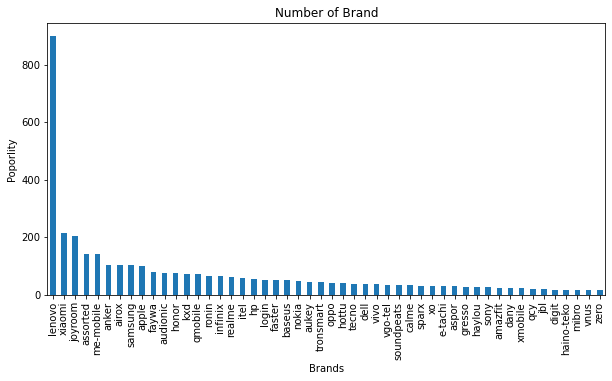

In [10]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df['Brand'].value_counts().nlargest(50).plot(kind='bar', figsize=(10, 5))
plt.title("Number of Brand")
plt.ylabel('Poporlity')
plt.xlabel('Brands')
plt.show()

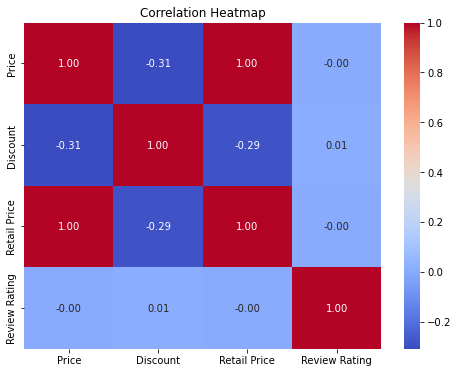

In [82]:
# df = pd.DataFrame(data)

# Calculate the correlation matrix
correlation_matrix = df.corr()

#Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
Mobile=[]
Tablet=[]
Smart_Watch=[]
Laptop=[]
for i in df['Category']:
    if i=='mobiles':
        Mobile.append(1)
    else:
        Mobile.append(0)
    if i=='tablets':
        Tablet.append(1)
    else:
        Tablet.append(0)
    if i=='smart-watches':
        Smart_Watch.append(1)
    else:
        Smart_Watch.append(0)
    if i=='laptops':
        Laptop.append(1)
    else:
        Laptop.append(0)
print(Mobile,Tablet,Smart_Watch,Laptop)


lenovo=[]
xiaomi=[]
apple=[]
samsung=[]
for i in df['Brand']:
    if i=='lenovo':
        lenovo.append(1)
    else:
        lenovo.append(0)
    if i=='xiaomi':
        xiaomi.append(1)
    else:
        xiaomi.append(0)
    if i=='apple':
        apple.append(1)
    else:
        apple.append(0)
    if i=='samsungs':
        samsung.append(1)
    else:
        samsung.append(0)
print(lenovo,xiaomi,apple,samsung)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [13]:
data = {
    'C-Mobile': Mobile,
    'C_Tablet': Tablet,
    'C-Smart_Watch': Smart_Watch,
    'C_Laptop': Laptop,
    'B_Lenovo': lenovo,
    'B_Xiaomi': xiaomi,
    'B_Apple': apple,
    'B_Samsung': samsung
}
new_df = pd.DataFrame(data)
new_df


,C-Mobile,C_Tablet,C-Smart_Watch,C_Laptop,B_Lenovo,B_Xiaomi,B_Apple,B_Samsung
0,1,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
3835,0,0,0,1,1,0,0,0
3836,0,0,0,1,1,0,0,0
3837,0,0,0,1,1,0,0,0
3838,0,0,0,1,1,0,0,0


In [14]:
new_df.describe()

,C-Mobile,C_Tablet,C-Smart_Watch,C_Laptop,B_Lenovo,B_Xiaomi,B_Apple,B_Samsung
count,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.0
mean,0.294271,0.019531,0.073177,0.254688,0.234375,0.056250,0.026302,0.0
std,0.455774,0.138401,0.260461,0.435742,0.423663,0.230434,0.160053,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [15]:
new_columns_df = pd.DataFrame(new_df)

# Merging the new DataFrame with the original DataFrame 'df'
dataset = pd.concat([df, new_columns_df], axis=1)

dataset

,Price,Discount,Retail Price,Brand,Category,Review Rating,C-Mobile,C_Tablet,C-Smart_Watch,C_Laptop,B_Lenovo,B_Xiaomi,B_Apple,B_Samsung
0,18499.0,20.0,22198.80,xiaomi,mobiles,3.1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20499.0,2.0,20908.98,vgo-tel,mobiles,3.1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26349.0,15.0,30301.35,itel,mobiles,3.1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,32999.0,11.0,36628.89,tecno,mobiles,3.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21499.0,32.0,28378.68,samsung,mobiles,2.7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3709,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3710,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3726,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3749,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [16]:
columns_to_drop = ['Brand','Category']  # Adjust 'Unnamed' based on its actual name if different

dataset.drop(columns=columns_to_drop, inplace=True)

In [17]:
dataset

,Price,Discount,Retail Price,Review Rating,C-Mobile,C_Tablet,C-Smart_Watch,C_Laptop,B_Lenovo,B_Xiaomi,B_Apple,B_Samsung
0,18499.0,20.0,22198.80,3.1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20499.0,2.0,20908.98,3.1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26349.0,15.0,30301.35,3.1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,32999.0,11.0,36628.89,3.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21499.0,32.0,28378.68,2.7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3709,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3710,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3726,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3749,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [18]:
duplicate_rows_df=dataset[dataset.duplicated()]
print('Duplicated Rows =:    ',duplicate_rows_df)

Duplicated Rows =:             Price  Discount  Retail Price  Review Rating  C-Mobile  C_Tablet  \
272   32999.0      11.0      36628.89            4.4       1.0       0.0   
729   74999.0       5.0      78748.95            3.2       1.0       0.0   
912   39999.0       5.0      41998.95            3.4       1.0       0.0   
931   98999.0       5.0     103948.95            4.1       1.0       0.0   
1030  23999.0       6.0      25438.94            3.3       1.0       0.0   
...       ...       ...           ...            ...       ...       ...   
3709      NaN       NaN           NaN            NaN       0.0       0.0   
3710      NaN       NaN           NaN            NaN       0.0       0.0   
3726      NaN       NaN           NaN            NaN       0.0       0.0   
3749      NaN       NaN           NaN            NaN       0.0       0.0   
3826      NaN       NaN           NaN            NaN       0.0       0.0   

      C-Smart_Watch  C_Laptop  B_Lenovo  B_Xiaomi  B_Apple  B_Sa

In [19]:
dataset = dataset.drop_duplicates()

In [20]:
print(dataset.isnull().sum())
print(dataset.dropna(inplace=True))
print((dataset))
print(dataset.isnull().sum())


Price             5
Discount          5
Retail Price      5
Review Rating     5
C-Mobile         54
C_Tablet         54
C-Smart_Watch    54
C_Laptop         54
B_Lenovo         54
B_Xiaomi         54
B_Apple          54
B_Samsung        54
dtype: int64
None
         Price  Discount  Retail Price  Review Rating  C-Mobile  C_Tablet  \
0      18499.0      20.0      22198.80            3.1       1.0       0.0   
1      20499.0       2.0      20908.98            3.1       1.0       0.0   
2      26349.0      15.0      30301.35            3.1       1.0       0.0   
3      32999.0      11.0      36628.89            3.5       1.0       0.0   
4      21499.0      32.0      28378.68            2.7       1.0       0.0   
...        ...       ...           ...            ...       ...       ...   
3835   94995.0      11.0     105444.45            2.6       0.0       0.0   
3836   98445.0      11.0     109273.95            2.5       0.0       0.0   
3837  169900.0      11.0     188589.00           

C:\Users\Mehrab Azum\AppData\Local\Temp\ipykernel_6376\140984018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  print(dataset.dropna(inplace=True))


In [21]:
duplicate_rows_df=dataset[dataset.duplicated()]
print('Duplicated Rows =:    ',duplicate_rows_df)

Duplicated Rows =:     Empty DataFrame
Columns: [Price, Discount, Retail Price, Review Rating, C-Mobile, C_Tablet, C-Smart_Watch, C_Laptop, B_Lenovo, B_Xiaomi, B_Apple, B_Samsung]
Index: []


In [22]:
dataset

,Price,Discount,Retail Price,Review Rating,C-Mobile,C_Tablet,C-Smart_Watch,C_Laptop,B_Lenovo,B_Xiaomi,B_Apple,B_Samsung
0,18499.0,20.0,22198.80,3.1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20499.0,2.0,20908.98,3.1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26349.0,15.0,30301.35,3.1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,32999.0,11.0,36628.89,3.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21499.0,32.0,28378.68,2.7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3835,94995.0,11.0,105444.45,2.6,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3836,98445.0,11.0,109273.95,2.5,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3837,169900.0,11.0,188589.00,4.8,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3838,168900.0,11.0,187479.00,4.2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


<AxesSubplot:ylabel='Price'>

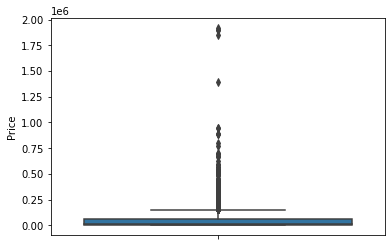

In [28]:

sns.boxplot(y=df['Price'])


<AxesSubplot:ylabel='Discount'>

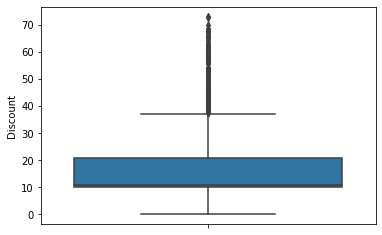

In [29]:
sns.boxplot(y=df['Discount'])

<AxesSubplot:ylabel='Retail Price'>

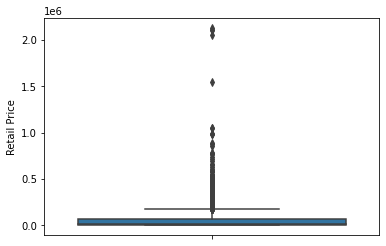

In [30]:
sns.boxplot(y=df['Retail Price'])

In [31]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.77)
IQR=Q3-Q1
print(IQR)

Price            68400.0000
Discount            12.0000
Retail Price     75320.9768
Review Rating        1.3000
dtype: float64


In [32]:
df=df[~((df <(Q1 -1.5 * IQR))|(df > (Q3+1.5*IQR))).any(axis=1)]
df.shape

C:\Users\Mehrab Azum\AppData\Local\Temp\ipykernel_6376\1876457489.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=df[~((df <(Q1 -1.5 * IQR))|(df > (Q3+1.5*IQR))).any(axis=1)]


(3232, 6)

<AxesSubplot:ylabel='Retail Price'>

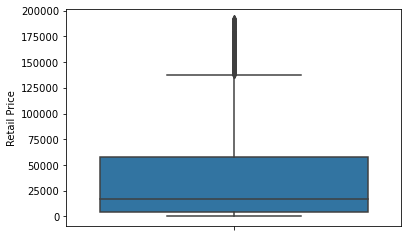

In [33]:
sns.boxplot(y=df['Retail Price'])


<AxesSubplot:ylabel='Discount'>

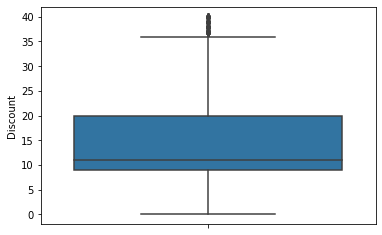

In [34]:
sns.boxplot(y=df['Discount'])



<AxesSubplot:ylabel='Retail Price'>

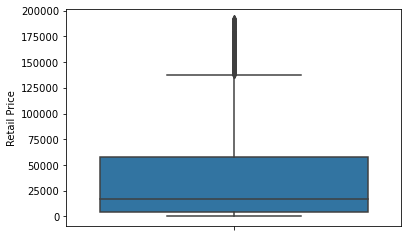

In [35]:
sns.boxplot(y=df['Retail Price'])


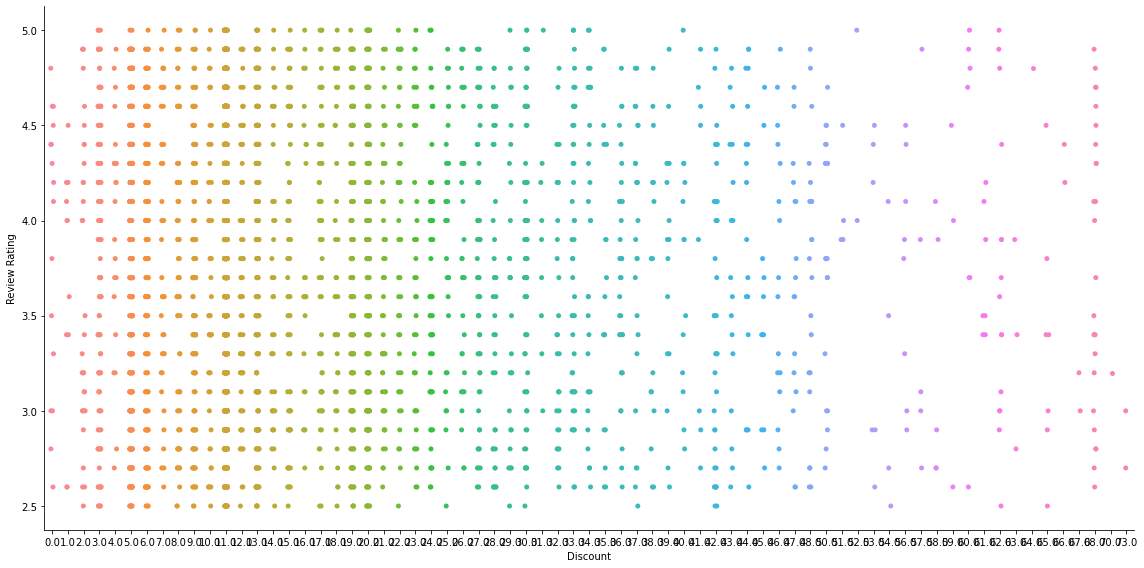

In [36]:
sns.catplot(x='Discount', y='Review Rating', data=dataset, kind='strip', height=8, aspect=2)
plt.xlabel('Discount')
plt.ylabel('Review Rating')
plt.show()

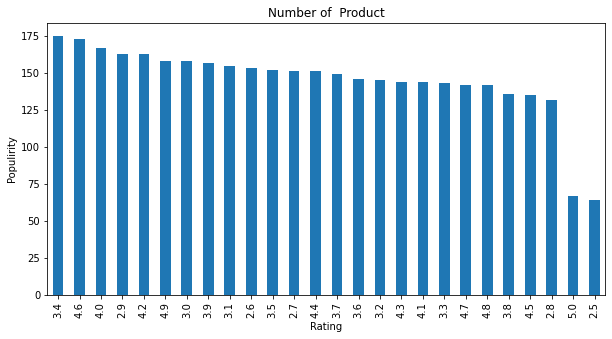

In [37]:
dataset['Review Rating'].value_counts().nlargest(40).plot(kind='bar', figsize=(10, 5))
plt.title("Number of  Product")
plt.ylabel('Populirity')
plt.xlabel('Rating')
plt.show()

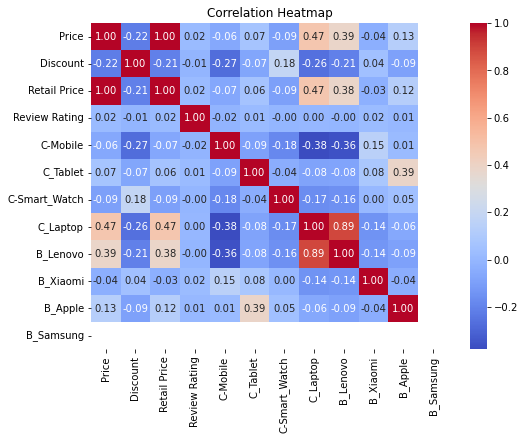

In [38]:
# Calculate the correlation matrix
correlation_matrix = dataset.corr()

#Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Text(0, 0.5, 'Review Rating')

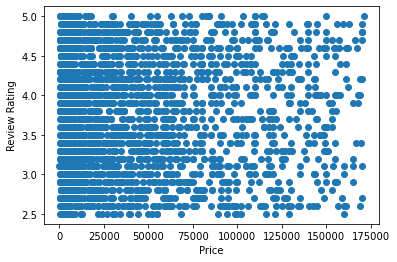

In [39]:
plt.scatter(df['Price'],df['Review Rating'])
plt.xlabel('Price')
plt.ylabel('Review Rating')

In [48]:
# Import necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import mean_squared_error


In [49]:
# x=df.drop(df['Review Rating'])
# x
# y=df['Review Rating']
# y
X = dataset.drop('Review Rating', axis=1)  # Drop the 'Review Rating' column to get the features
y = dataset['Review Rating']


In [50]:
#from sklearn.metrics import accuracy_score,confusion_matrix,F1_score, recall_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, classification_report

In [51]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multiple linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error as a performance metric
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Note: Visualization becomes more complex with multiple variables, and you may need 3D or pair plots for better understanding.

# Optional: Print the coefficients and intercept
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')


Mean Squared Error: 0.5025126701426748
Coefficients: [-4.72979231e-06 -1.26406954e-03  4.30480174e-06 -5.32961541e-02
  2.84702934e-02 -8.52147691e-02 -7.90386411e-02  1.84850496e-02
  6.33563731e-02  2.30640278e-02  0.00000000e+00]
Intercept: 3.790435578179064


In [52]:
from sklearn.ensemble import RandomForestRegressor


In [69]:
X=dataset['Discount']
y = dataset['Review Rating']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean Squared Error: 0.5070083715230059
R-squared: -0.02266674311059469


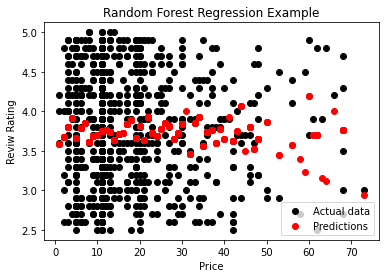

In [71]:
# Create a Random Forest regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Convert pandas Series to NumPy arrays and reshape
X_train_reshaped = X_train.values.reshape(-1, 1)
X_test_reshaped = X_test.values.reshape(-1, 1)

# Train the model
model.fit(X_train_reshaped, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_reshaped)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot the data and the regression predictions
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.scatter(X_test, y_pred, color='red', label='Predictions')
plt.xlabel('Price')
plt.ylabel('Reviw Rating')
plt.title('Random Forest Regression Example')
plt.legend()
plt.show()


# INSIGHT:
The discount of range is not max or not less but only in normal range . 
therefore if the discount is high or low then the feedback of the costumer is not good about the product.
if the discount price is in normal range i.e 5% to 25% then the costumer give good feedback about the brand or product,

